In [6]:
from parser_java import get_unit_test_files, get_target_files 
from file_metrics import  get_history_files, get_avg_code_churn_test_target
from plot_utils import plot_lines_test_vs_target_numeric_side_by_side
from modfied_file import get_modifications_of_files
repo_path = "/mnt/data/apache_repos/maven-resolver"

# RQ3 - link a test class (file) to a tested class (file)

In [2]:
all_test_files = get_unit_test_files(repo_path)
if len(all_test_files) == 0:
    print("No test files found")
    exit(0)

map_files = get_target_files(repo_path, all_test_files)

Total number of test files:  158
Total number of test/target pairs: 134


# RQ1 -  Test class (file) created (a) before, (b) after, or (c) in the same commit as a tested class (file)

In [3]:
all_files = [map_['test'] for map_ in map_files] + [map_['target'] for map_ in map_files]
all_files_info = get_modifications_of_files(repo_path, all_files)

map_files_info = []
for map_ in map_files:
    map_files_info.append({
        'test': all_files_info[map_['test']],
        'target': all_files_info[map_['target']]
    })

map_before, map_same, map_after = get_history_files(map_files_info, repo_path)

print(f"repo: {repo_path}")
print("Before: " + str(len(map_before)))
print("Same: " + str(len(map_same)))
print("After: " + str(len(map_after)))

repo: /mnt/data/apache_repos/maven-resolver
Before: 1
Same: 89
After: 44


# RQ2 - How does the size of a commit impact the results

In [4]:

avg_test_before, avg_target_before = get_avg_code_churn_test_target(map_before)
avg_test_same, avg_target_same = get_avg_code_churn_test_target(map_same)
avg_test_after, avg_target_after = get_avg_code_churn_test_target(map_after)

print("Average,   Test,   Target")
print("Average before: " + str(avg_test_before) + ", " + str(avg_target_before))
print("Average same: " + str(avg_test_same) + ", " + str(avg_target_same))
print("Average after: " + str(avg_test_after) + ", " + str(avg_target_after))
# Plot this for every repo

Average,   Test,   Target
Average before: 304.0, 112.0
Average same: 143.3370786516854, 205.25842696629215
Average after: 117.56818181818181, 179.0909090909091


# Extra - Visualise the data

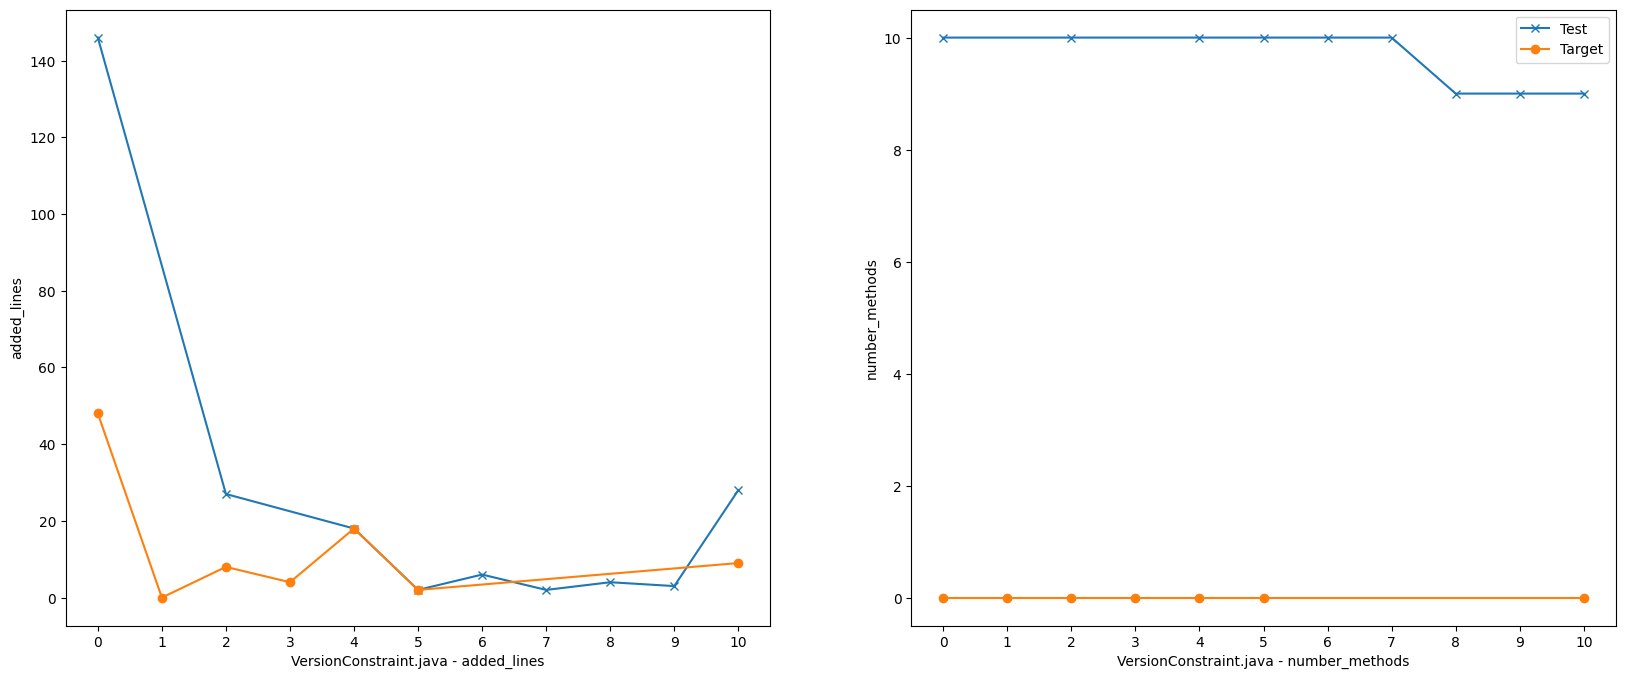

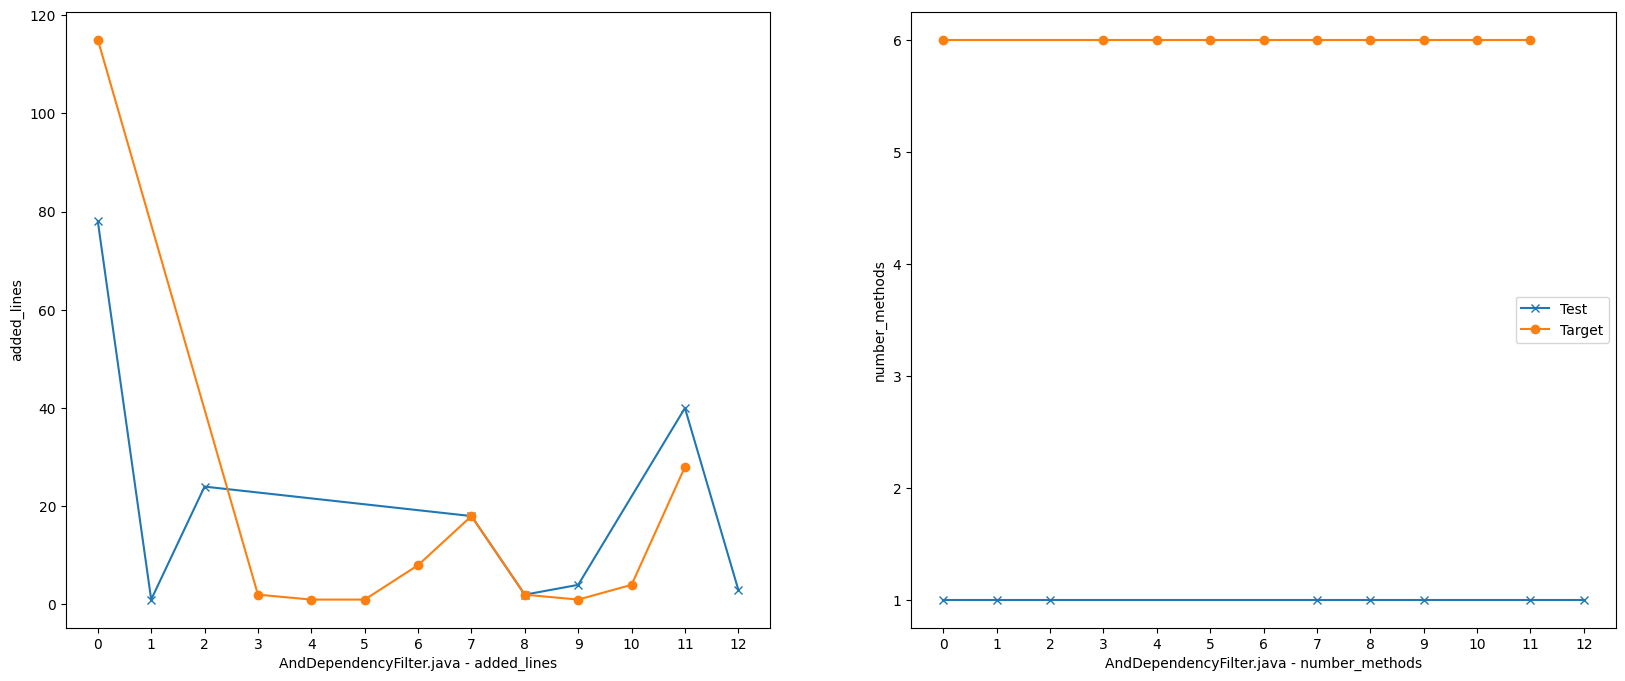

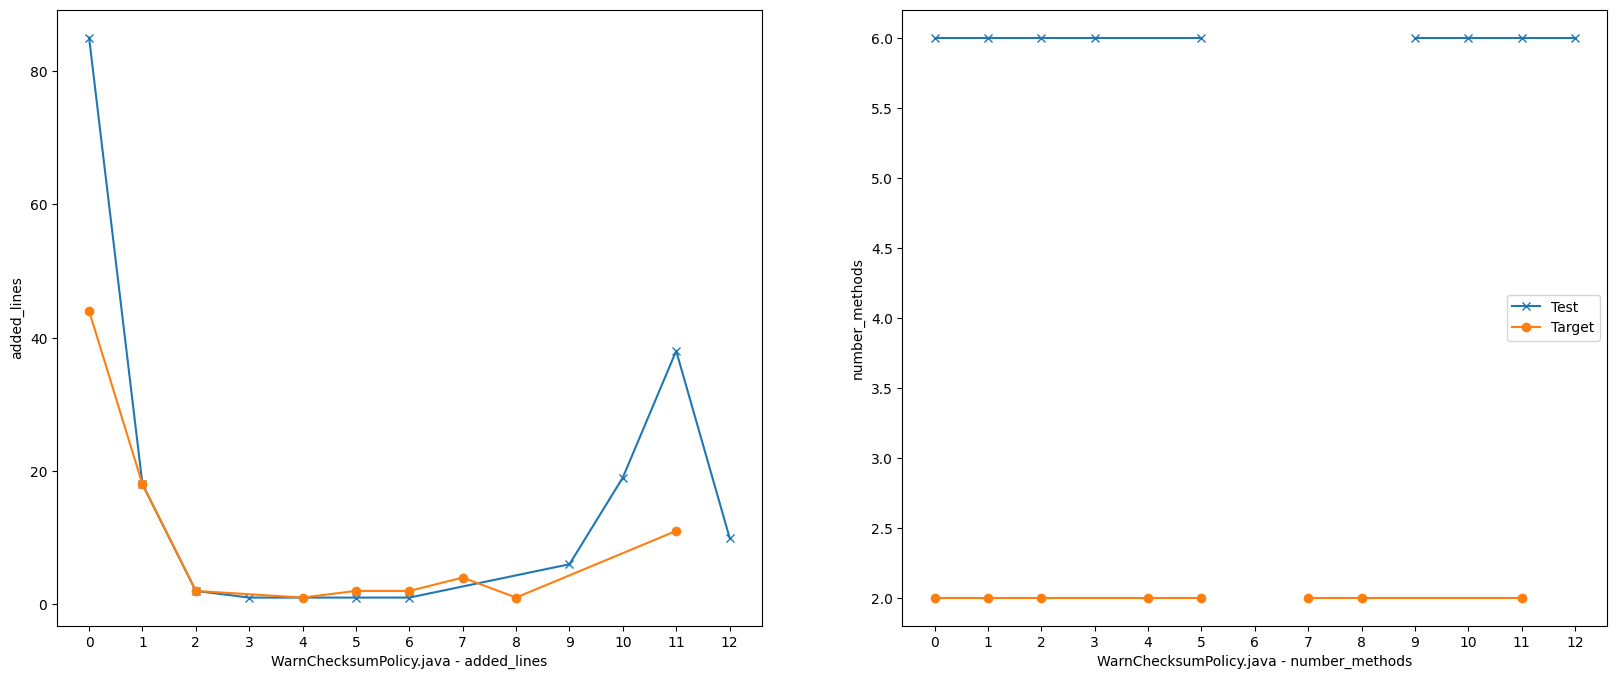

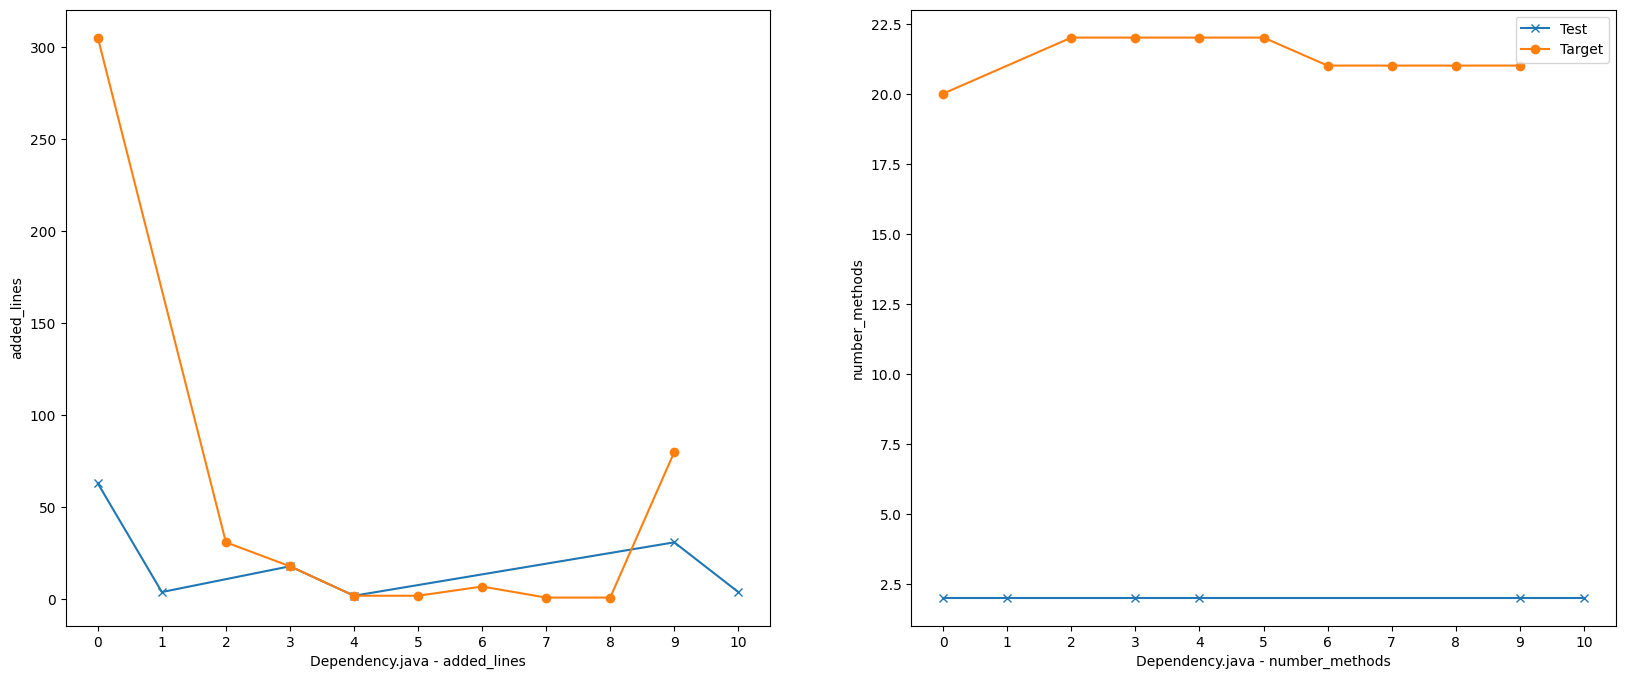

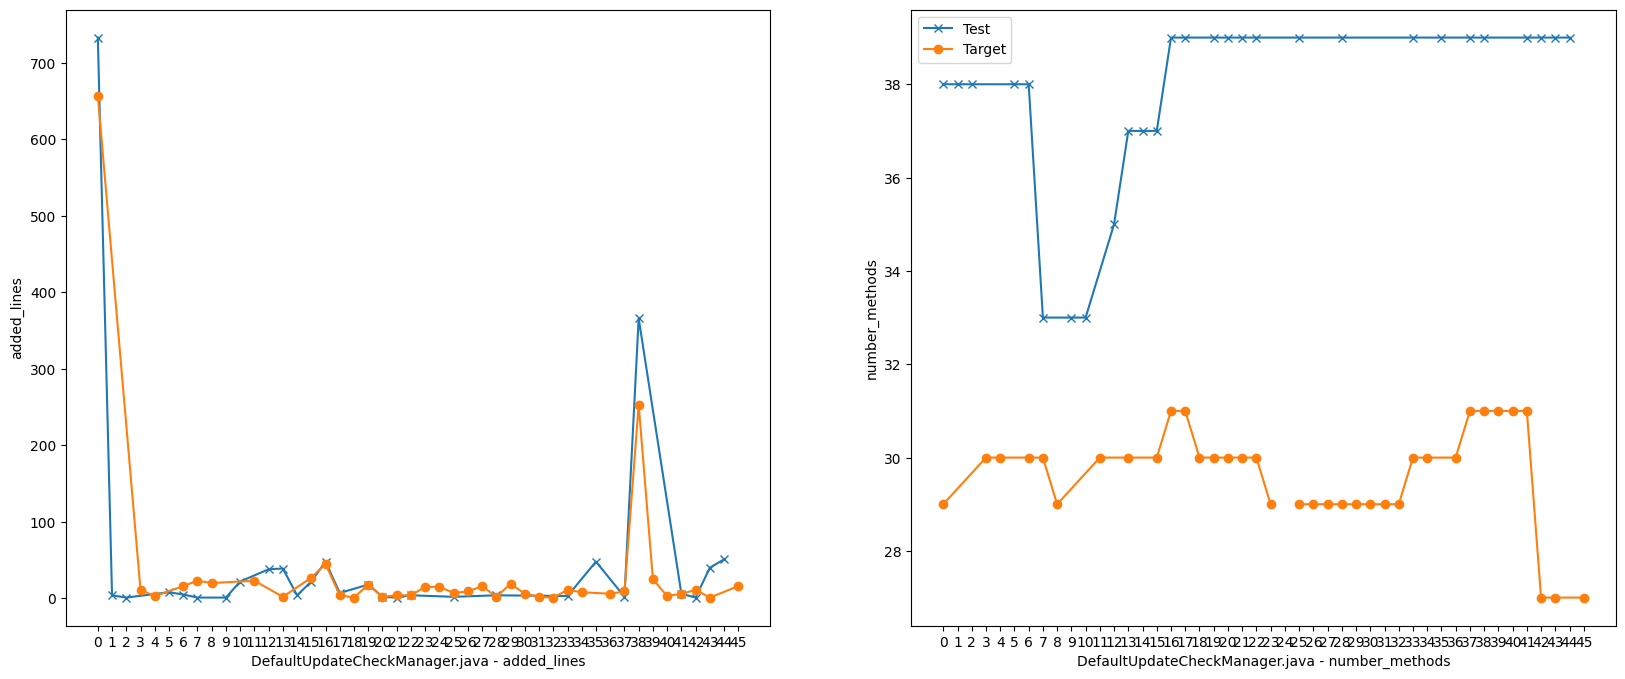

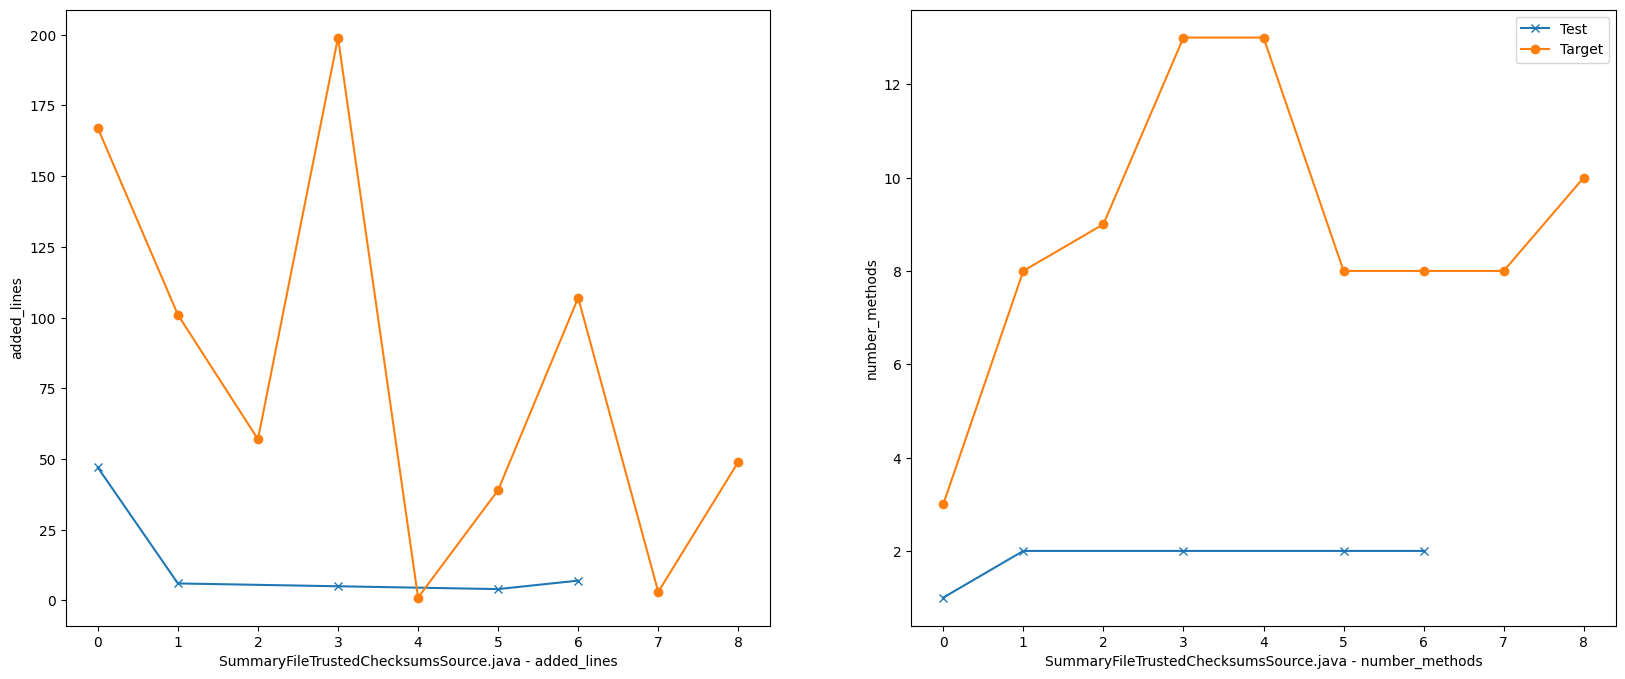

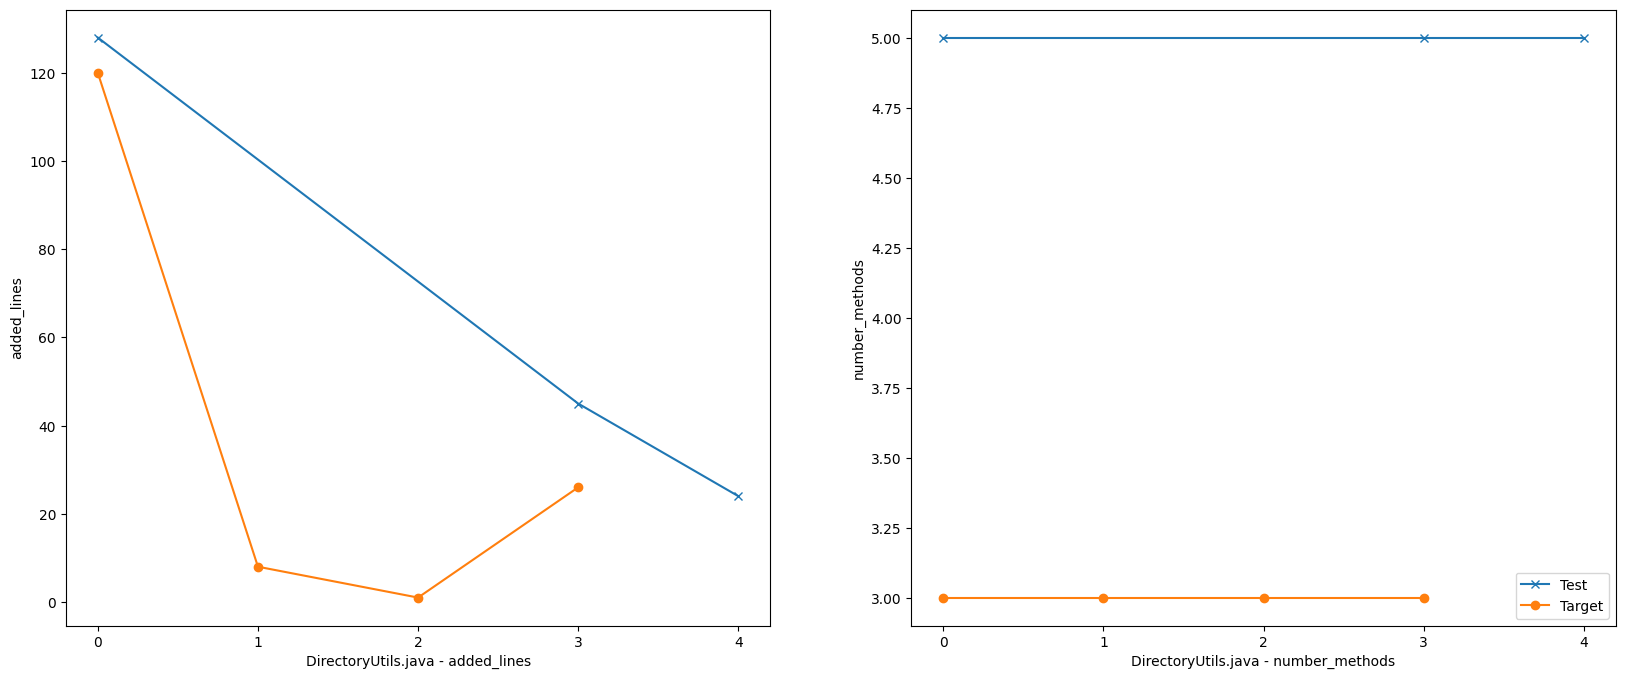

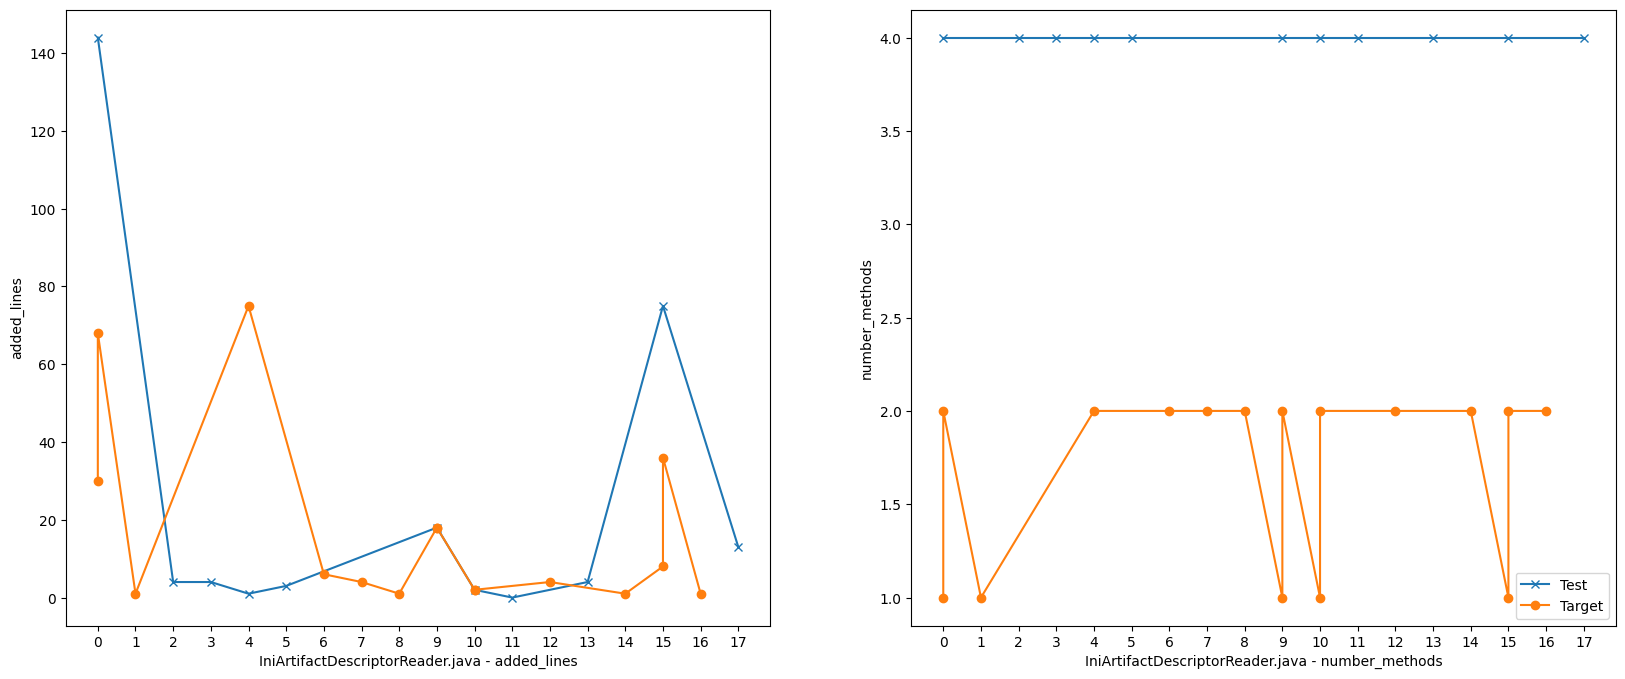

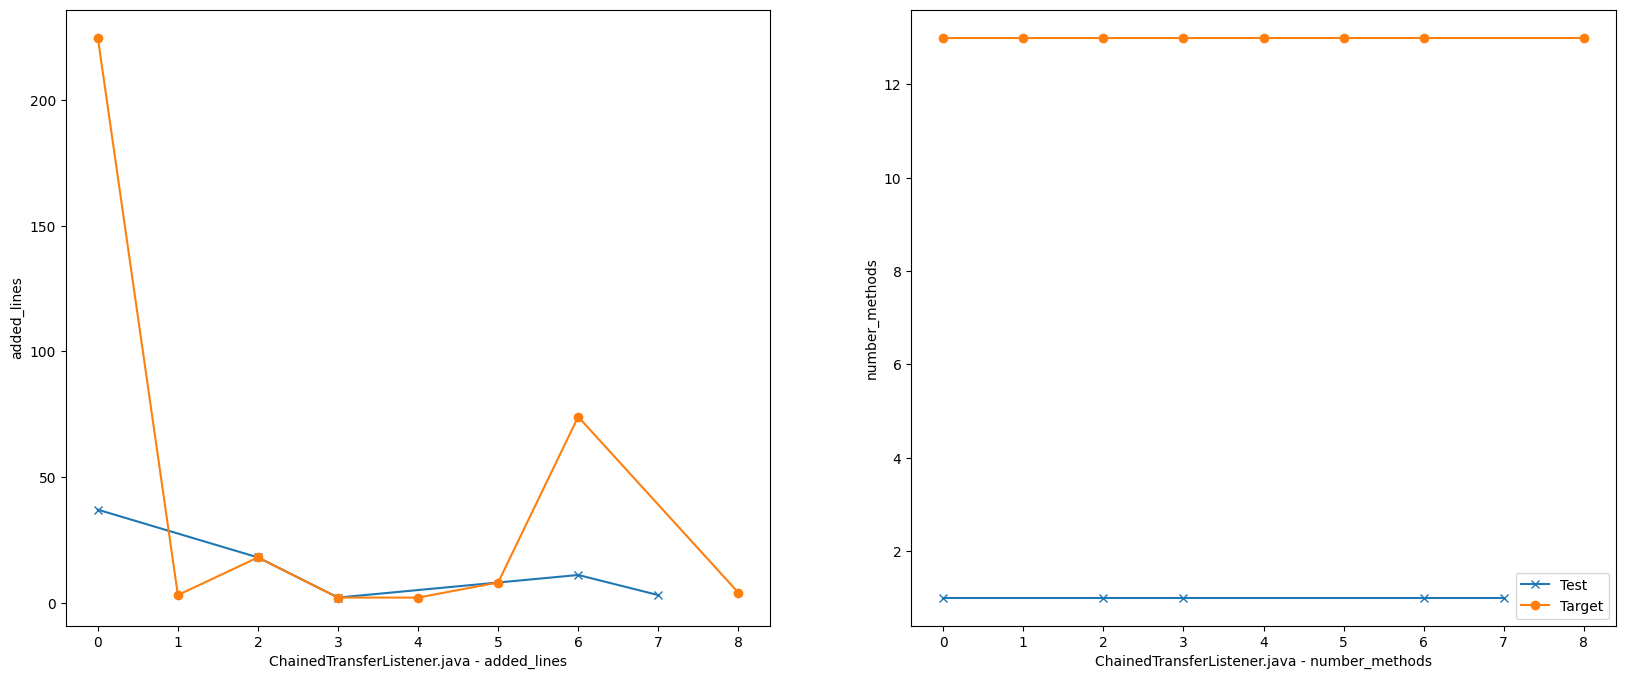

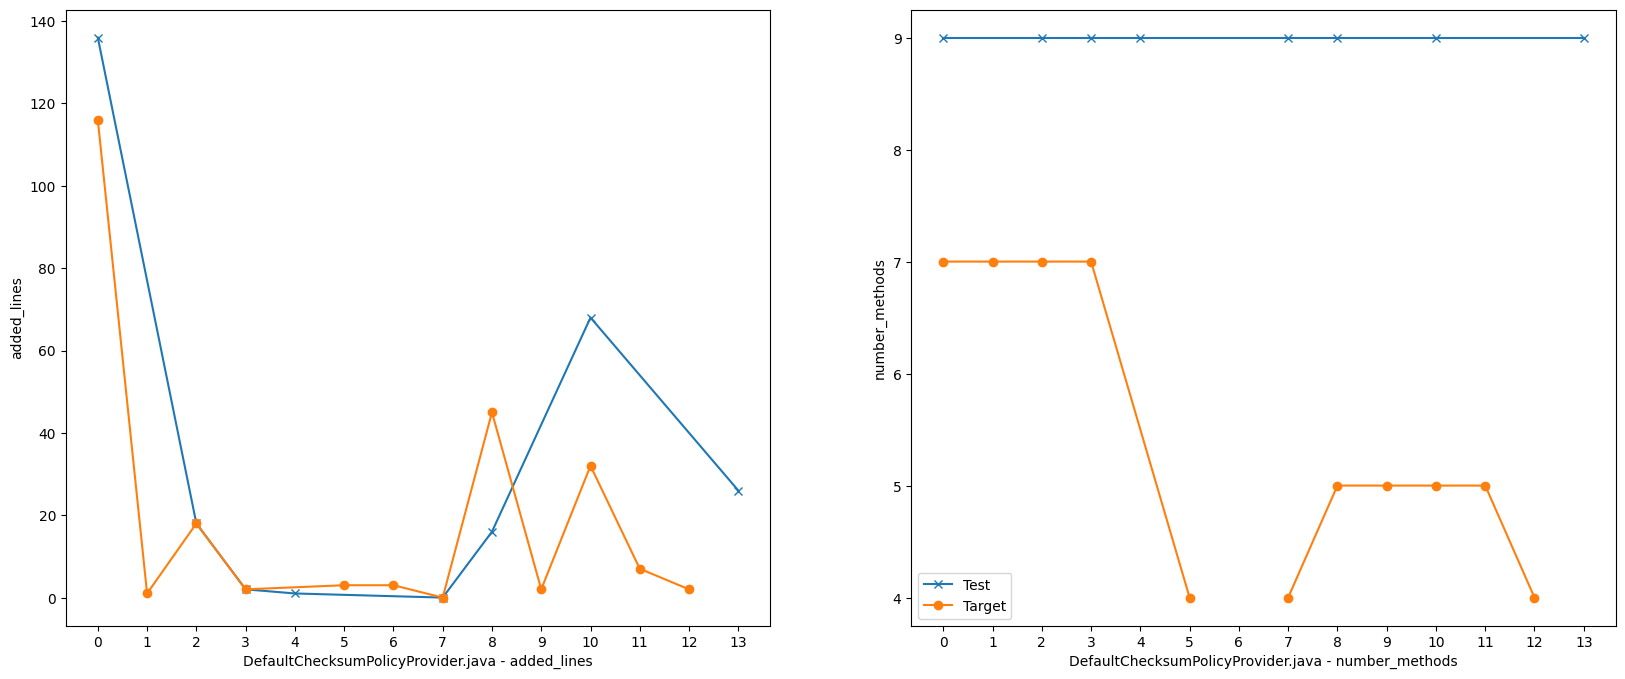

In [7]:
for map_ in map_same[:10]:
  plot_lines_test_vs_target_numeric_side_by_side(map_['test'], map_['target'], "added_lines", "number_methods")